# Pymaceuticals Inc.
---

### Analysis
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = df["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dupe_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df = df.loc[df["Mouse ID"]==dupe_mice[0]]
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_df['Mouse ID'].unique())
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
"Median Tumor Volume": median_tumor,
"Tumor Volume Variance": var_tumor,
"Tumor Volume Std. Dev.": stdev_tumor,
"Tumor Volume Std. Err.": sem_tumor})

regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
regimen_summary_agg = clean_df.groupby("Drug Regimen").agg({
"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

regimen_summary_agg.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

regimen_summary_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

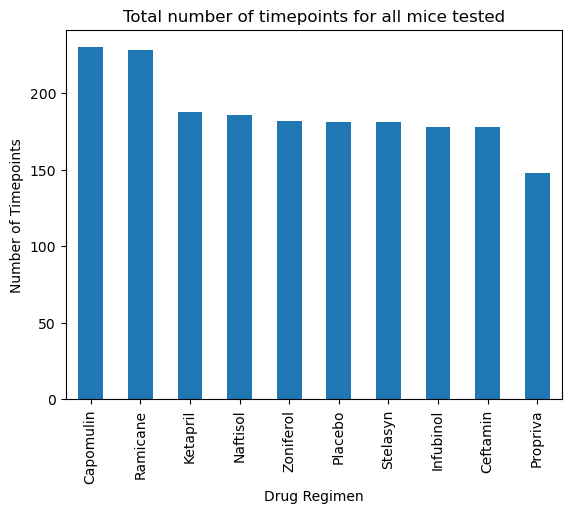

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.title("Total Number of Timepoints for All Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

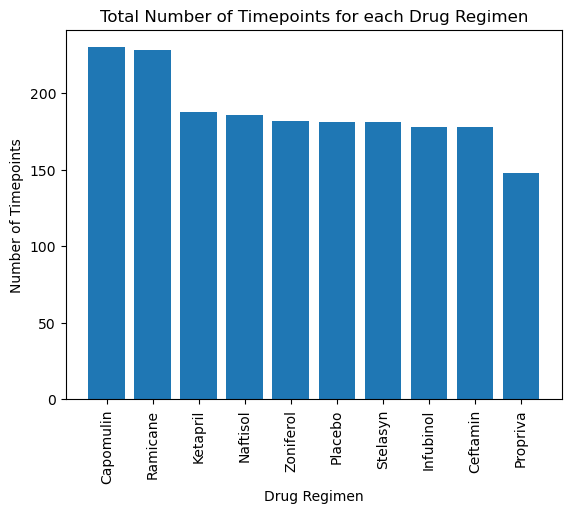

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_count = clean_df["Drug Regimen"].value_counts()
plt.bar(drug_count.index.values, drug_count.values)
plt.xticks(rotation=90)

plt.title("Total Number of Timepoints for All Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()


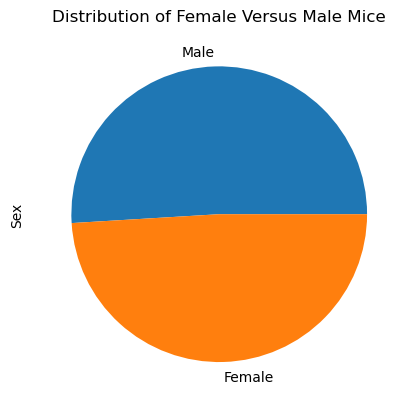

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = clean_df["Sex"].value_counts().plot(kind="pie")
plt.title("Distribution of Female Versus Male Mice")
plt.show()

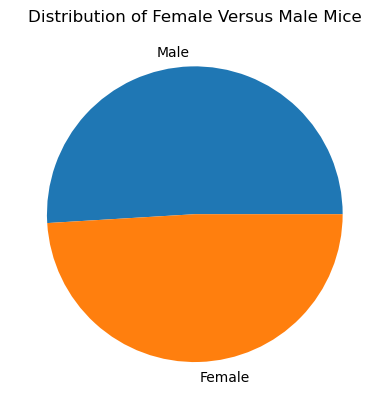

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_plot = clean_df["Sex"].value_counts()
plt.pie(py_plot.values,labels=py_plot.index.values)
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_timepoint = pd.merge(max_timepoint, clean_df, on=["Mouse ID", "Timepoint"], how="left")


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through the treatments list and get the tumor volumes for each mouse
for treatment in treatments:
    tumor_volumes = merged_max_timepoint.loc[merged_max_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    # Loop through the treatments list and get the tumor volumes for each mouse

for i, data in enumerate(tumor_vol_data):
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print(f"{treatments[i]} potential outliers: {outliers}")
    

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


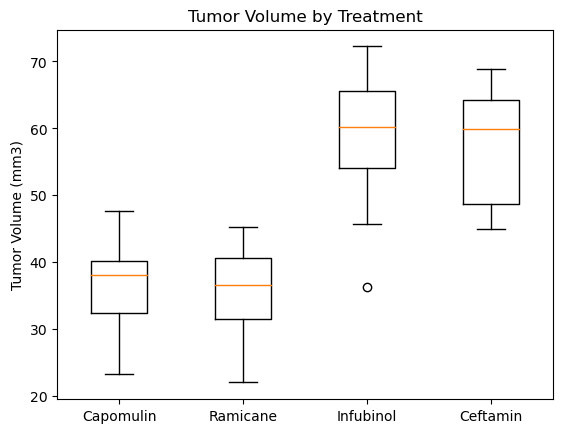

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()


## Line and Scatter Plots

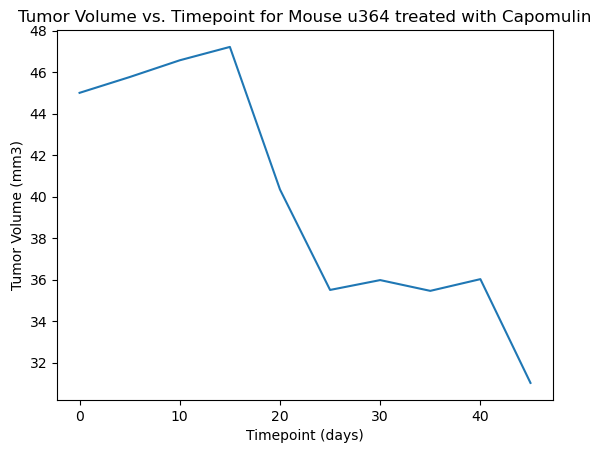

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].sample().iloc[0]
mouse_capomulin_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id]

plt.plot(mouse_capomulin_data["Timepoint"], mouse_capomulin_data["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


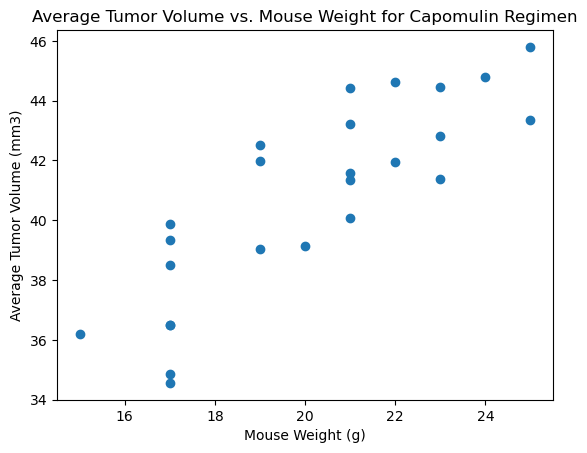

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Pearson correlation coefficient: 0.84
Linear regression model: y = 0.95x + 21.55


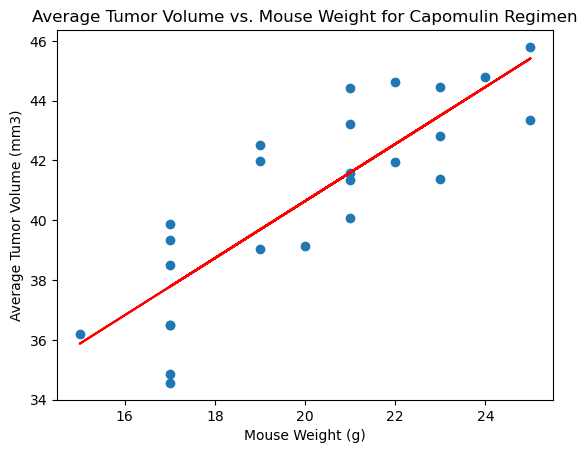

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_coef, _ = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"Pearson correlation coefficient: {corr_coef:.2f}")

slope, intercept, rvalue, pvalue, _ = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

regress_values = slope * capomulin_avg["Weight (g)"] + intercept
plt.plot(capomulin_avg["Weight (g)"], regress_values, color='red')

plt.show()